Plotting Chexpert metrics...
Converting training_time_seconds to hours for Chexpert...


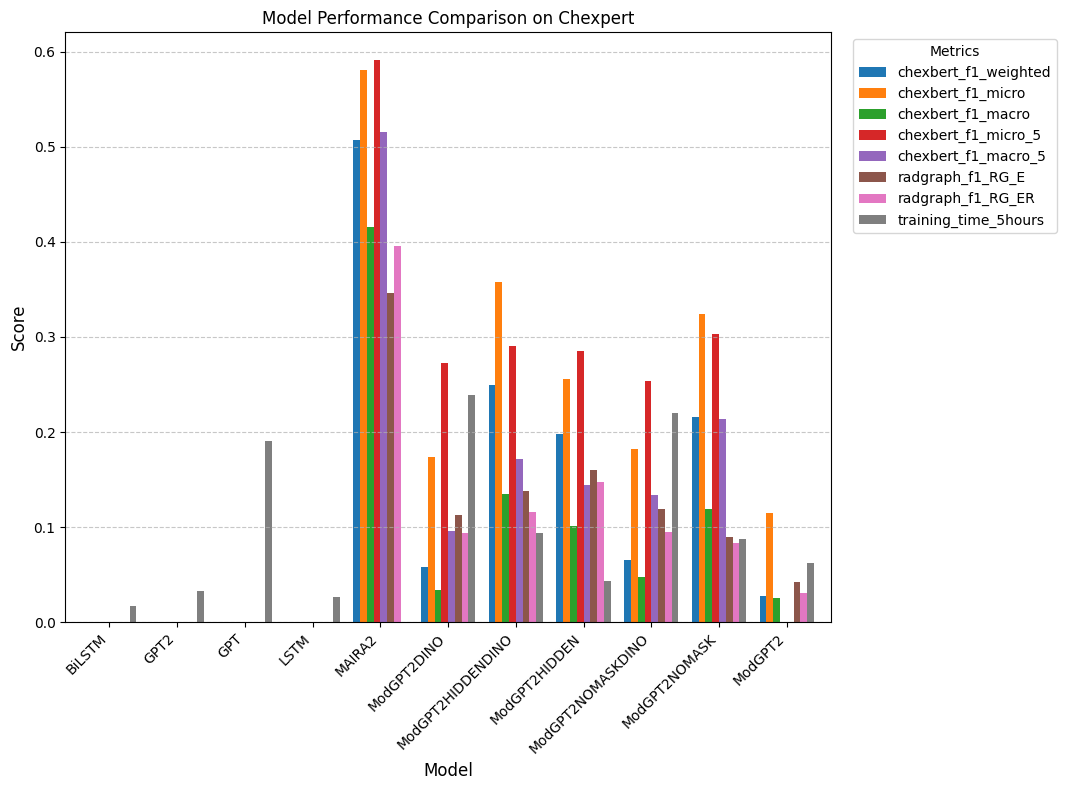

Plotting MIMIC metrics...
Converting training_time_seconds to hours for MIMIC...


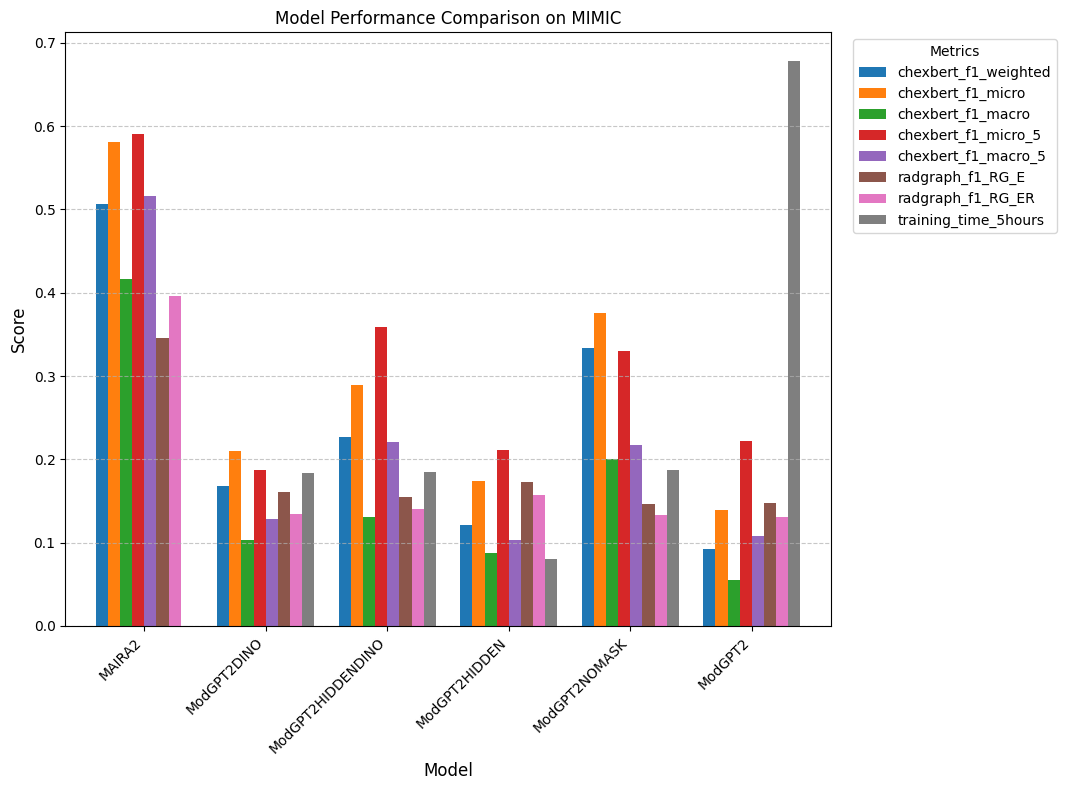

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load Data from JSON Files ---
# (This loading code is the same as before)

json_paths_folder = "lstm-vs-gpt/results_complete"
json_files = [f for f in os.listdir(json_paths_folder) if f.endswith('.json')]

# Load Chexpert data
json_files_chexpert = [f for f in json_files if 'Chexpert' in f]
model_names_chexpert = [f.split('_')[0] for f in json_files_chexpert]
values_chexpert = {}
for i in range(len(model_names_chexpert)):
    model_name = model_names_chexpert[i]
    file_path = os.path.join(json_paths_folder, json_files_chexpert[i])
    try:
        with open(file_path, 'r') as f:
            values_chexpert[model_name] = json.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Load MIMIC data
json_files_mimic = [f for f in json_files if 'MIMIC' in f]
model_names_mimic = [f.split('_')[0] for f in json_files_mimic]
values_mimic = {}
for i in range(len(model_names_mimic)):
    model_name = model_names_mimic[i]
    file_path = os.path.join(json_paths_folder, json_files_mimic[i])
    try:
        with open(file_path, 'r') as f:
            values_mimic[model_name] = json.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# --- 2. Plotting Function (UPDATED) ---

def plot_model_metrics(data_dict, dataset_name):
    """
    Creates a grouped bar chart for model metrics.
    
    Args:
        data_dict (dict): The dictionary {model_name: {metric: score}}.
        dataset_name (str): The name of the dataset (e.g., "Chexpert").
    """
    if not data_dict:
        print(f"No data to plot for {dataset_name}.")
        return

    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(data_dict)
    
    # Transpose so models are rows and metrics are columns
    df_transposed = df.T

    # --- NEW: Convert training time from seconds to hours ---
    if "training_time_seconds" in df_transposed.columns:
        print(f"Converting training_time_seconds to hours for {dataset_name}...")
        # 1. Divide the value to convert it
        df_transposed["training_time_seconds"] = df_transposed["training_time_seconds"] / (3600*5)
        
        # 2. Rename the column for a clear plot legend
        df_transposed = df_transposed.rename(
            columns={"training_time_seconds": "training_time_5hours"}
        )
    # --- End of new code ---

    # Create the grouped bar chart
    ax = df_transposed.plot(
        kind='bar', 
        figsize=(12, 8), 
        title=f'Model Performance Comparison on {dataset_name}',
        width=0.8
    )

    # --- Customize the plot ---
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Place the legend outside of the plotting area
    ax.legend(title='Metrics', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Add gridlines for easier reading
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent legend from being cut off
    plt.tight_layout(rect=[0, 0, 0.9, 1]) 
    
    # Display the plot
    plt.show()

# --- 3. Generate the Plots ---

print("Plotting Chexpert metrics...")
plot_model_metrics(values_chexpert, "Chexpert")



print("Plotting MIMIC metrics...")
plot_model_metrics(values_mimic, "MIMIC")